In [ ]:
#
# hw4pr2digits_modeler:  handwritten-digit modeling with k-nearest neighbors...
#

In [ ]:
#
# SUGGESTION:  
# 
# +++ copy-paste-and-alter from the iris- + births-cleaning notebooks into here +++
#
# when the data is ready to view, you might want to grab
# the digits-visualization code    (it was in hw3pr2.ipynb)
#

In [3]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd 

In [4]:
cleaned_filename = "digits_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{cleaned_filename} : file read into a pandas dataframe.")
df_tidy

digits_cleaned.csv : file read into a pandas dataframe.


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [5]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

In [6]:
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place 
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
df_model1 = df_tidy
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23'

In [8]:
A = df_model1.to_numpy()    # .values gets the numpy array
print(A)

[[ 0  0  9 ...  1  0  8]
 [ 0  0 11 ...  0  0  9]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  8]
 [ 0  0  2 ...  0  0  9]
 [ 0  0 10 ...  1  0  8]]


In [9]:
A = A.astype('float64')  # so many types:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A)

[[ 0.  0.  9. ...  1.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [10]:
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 65 cols


In [14]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:64]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,64]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features) are \n {X_all}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [8. 9. 0. ... 8. 9. 8.]
X_all (just the features) are 
 [[ 0.  0.  9. ... 11.  1.  0.]
 [ 0.  0. 11. ...  3.  0.  0.]
 [ 0.  0.  1. ...  3.  0.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [15]:
#
# we scramble the data, to remove (potential) dependence on its ordering: 
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_labeled = X_all[indices]              # we apply the _same_ permutation to each!
y_labeled = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_labeled}")
print(f"The corresponding data rows are \n {X_labeled}")


The scrambled labels/species are 
 [6. 4. 9. ... 8. 3. 7.]
The corresponding data rows are 
 [[ 0.  0.  0. ... 14.  9.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  1. 14. ...  4.  0.  0.]
 ...
 [ 0.  0.  6. ...  1.  0.  0.]
 [ 0.  2. 13. ...  9.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]]


In [16]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}")
print(f"X_test (a few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}")
print(f"X_train (a few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354)
y_test: [5. 0. 2. 1. 9. 6. 4. 5. 7. 2. 6. 2. 7. 5. 9. 9. 4. 1. 2. 3. 1. 8. 5. 4.
 2. 2. 7. 6. 6. 5. 8. 9. 8. 3. 4. 3. 0. 8. 7. 6. 4. 4. 1. 3. 1. 9. 1. 9.
 3. 8. 5. 1. 0. 6. 4. 3. 2. 0. 8. 3. 5. 5. 8. 6. 7. 4. 9. 0. 9. 4. 0. 7.
 0. 9. 7. 8. 5. 4. 0. 5. 3. 4. 4. 3. 6. 6. 2. 3. 7. 0. 2. 9. 2. 4. 3. 7.
 8. 6. 7. 8. 5. 8. 2. 0. 5. 0. 6. 2. 4. 7. 3. 6. 1. 8. 7. 4. 3. 6. 3. 2.
 8. 7. 2. 1. 1. 9. 4. 3. 2. 6. 3. 6. 3. 9. 1. 6. 2. 5. 7. 5. 4. 1. 1. 9.
 2. 1. 9. 1. 9. 6. 3. 4. 4. 1. 0. 0. 2. 5. 3. 7. 5. 2. 8. 4. 0. 6. 6. 7.
 8. 5. 9. 1. 2. 6. 8. 3. 3. 4. 2. 2. 5. 9. 3. 1. 5. 2. 5. 1. 4. 3. 2. 0.
 0. 6. 4. 9. 3. 9. 4. 5. 4. 3. 9. 9. 3. 0. 8. 0. 4. 9. 1. 2. 3. 8. 9. 6.
 2. 9. 2. 2. 9. 0. 1. 2. 3. 5. 4. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 1. 4. 4. 6. 0. 9. 6. 7. 6. 1. 7. 3. 1. 9. 9. 7. 9. 0. 8. 3. 3. 2.
 6. 4. 3. 6. 4. 8. 6. 9. 0. 6. 1. 5. 2. 8. 6. 6. 4. 9. 0. 3. 7. 5. 3. 6.
 1. 4. 9. 8. 2. 4. 1. 9. 3. 0.

In [18]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a kNN model and train it! 
#
from sklearn.neighbors import KNeighborsClassifier

k = 5  # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN

# we train the model (it's one line!)
knn_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a knn classifier with k =", k)  

Created and trained a knn classifier with k = 5


In [20]:
#
# to do this, we use "cross validation"
#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#
best_k = 84 # Not correct!
best_accuracy = 0.0  # also not correct...

# Note that we are cross-validating using only our TEST data!
for k in range(1,85):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build knn_model for every k!
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    # print(cv_scores)  # just to see the five scores... 
    average_cv_accuracy = cv_scores.mean()  # mean() is numpy's built-in average function 
    print(f"k: {k:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    
# assign best value of k to best_k
    if average_cv_accuracy > best_accuracy:
        best_k = k    # at the moment this is incorrect   TO DO for hw4pr1: fix this...
        best_accuracy = average_cv_accuracy
# you'll need to use the loop above to find and remember the real best_k

print(f"best_k = {best_k}   yields the highest average cv accuracy.")  # print the best one

#
# Your task:  
#    is to use this loop to remember the best value of k in the variable best_k
#    (feel free to use best_k and best_accuracy, above)    

k:  1  cv accuracy:  0.9866
k:  2  cv accuracy:  0.9830
k:  3  cv accuracy:  0.9837
k:  4  cv accuracy:  0.9816
k:  5  cv accuracy:  0.9844
k:  6  cv accuracy:  0.9802
k:  7  cv accuracy:  0.9809
k:  8  cv accuracy:  0.9809
k:  9  cv accuracy:  0.9823
k: 10  cv accuracy:  0.9816
k: 11  cv accuracy:  0.9788
k: 12  cv accuracy:  0.9760
k: 13  cv accuracy:  0.9724
k: 14  cv accuracy:  0.9696
k: 15  cv accuracy:  0.9689
k: 16  cv accuracy:  0.9675
k: 17  cv accuracy:  0.9675
k: 18  cv accuracy:  0.9668
k: 19  cv accuracy:  0.9653
k: 20  cv accuracy:  0.9639
k: 21  cv accuracy:  0.9632
k: 22  cv accuracy:  0.9625
k: 23  cv accuracy:  0.9611
k: 24  cv accuracy:  0.9611
k: 25  cv accuracy:  0.9618
k: 26  cv accuracy:  0.9604
k: 27  cv accuracy:  0.9590
k: 28  cv accuracy:  0.9561
k: 29  cv accuracy:  0.9576
k: 30  cv accuracy:  0.9561
k: 31  cv accuracy:  0.9533
k: 32  cv accuracy:  0.9533
k: 33  cv accuracy:  0.9505
k: 34  cv accuracy:  0.9498
k: 35  cv accuracy:  0.9484
k: 36  cv accuracy: 

In [25]:
#
# Ok!  We have tuned knn to use the "best" value of k...
#
# And, we should now use ALL available data to train our final predictive model:
#

knn_model_final = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k
knn_model_final.fit(X_all, y_all)                              # here we use ALL the data!
print(f"Created + trained a 'final' knn classifier, with a (best) k of {best_k}") 

Created + trained a 'final' knn classifier, with a (best) k of 1


In [26]:
#
# +++ This cell will "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = knn_model.predict(X_test)   
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [5. 0. 2. 1. 8. 6. 4. 5. 7. 2. 6. 2. 7. 5. 9. 9. 4. 1. 2. 3. 1. 8. 5. 4.
 2. 2. 7. 6. 6. 5. 8. 9. 8. 3. 4. 3. 0. 8. 7. 6. 4. 4. 1. 3. 1. 9. 1. 5.
 3. 8. 5. 1. 0. 6. 4. 3. 2. 0. 8. 3. 5. 5. 8. 6. 7. 4. 9. 0. 9. 4. 0. 7.
 0. 9. 7. 8. 5. 4. 0. 5. 3. 4. 4. 3. 6. 6. 2. 3. 7. 0. 2. 9. 2. 4. 3. 7.
 8. 6. 7. 8. 5. 8. 2. 0. 5. 0. 6. 2. 4. 7. 3. 6. 1. 8. 7. 4. 3. 6. 3. 2.
 8. 7. 2. 1. 1. 9. 4. 3. 2. 6. 3. 6. 3. 9. 1. 6. 2. 5. 7. 5. 4. 1. 1. 9.
 2. 1. 9. 1. 9. 6. 3. 4. 4. 1. 0. 0. 2. 5. 3. 7. 5. 2. 8. 4. 0. 6. 6. 7.
 8. 5. 9. 1. 2. 6. 8. 3. 3. 4. 2. 2. 5. 9. 3. 1. 5. 2. 5. 1. 4. 3. 2. 0.
 0. 6. 4. 9. 3. 9. 4. 5. 4. 3. 9. 9. 3. 0. 8. 0. 4. 9. 1. 2. 3. 8. 9. 6.
 2. 9. 2. 2. 9. 0. 1. 2. 3. 5. 4. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 1. 4. 4. 6. 0. 9. 6. 7. 6. 1. 7. 3. 1. 9. 9. 7. 9. 0. 8. 3. 3. 2.
 6. 4. 3. 6. 4. 8. 6. 9. 0. 1. 1. 5. 2. 8. 6. 6. 4. 9. 0. 3. 7. 5. 3. 6.
 1. 4. 9. 8. 2. 4. 1. 9. 3. 0. 7. 3. 5. 7. 9. 1. 6. 7. 9. 3. 8. 2. 2. 3.
 3. 2. 1. 9. 5. 4. 7. 8. 9. 5. 1.

In [27]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of 64 ints, each representing the cof a pixel 
                
        output: the predicted digit from the list of pixel values
                 
    """
    our_features = np.asarray([Features])                 # extra brackets needed

    # The model's prediction!
    predicted_digit = Model.predict(our_features)
    
    # a bit awkward
    predicted_digit = int(round(predicted_digit[0]))  # unpack one element
    return predicted_digit


#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
# Features = [6.7,3.3,5.7,0.1]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoF = [[0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0],
[0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0],
[0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0],
[0,0,0,3,15,10,1,0,0,0,0,11,10,16,4,0,0,0,0,12,1,15,6,0,0,0,0,3,4,15,4,0,0,0,0,6,15,6,0,0,0,4,15,16,9,0,0,0,0,0,13,16,15,9,3,0,0,0,0,4,9,14,7,0],
[0,0,0,3,16,3,0,0,0,0,0,10,16,11,0,0,0,0,4,16,16,8,0,0,0,2,14,12,16,5,0,0,0,10,16,14,16,16,11,0,0,5,12,13,16,8,3,0,0,0,0,2,15,3,0,0,0,0,0,4,12,0,0,0],
[0,0,7,15,15,4,0,0,0,8,16,16,16,4,0,0,0,8,15,8,16,4,0,0,0,0,0,10,15,0,0,0,0,0,1,15,9,0,0,0,0,0,6,16,2,0,0,0,0,0,8,16,8,11,9,0,0,0,9,16,16,12,3,0]]
  
# run on each one:
for Features in LoF:
    predicted_digit = predictive_model( Features, knn_model_final )  # pass in the model, too!
    print(f"I predict {predicted_digit} from the features {Features}")

I predict 4 from the features [0, 0, 0, 8, 14, 0, 0, 0, 0, 0, 5, 16, 11, 0, 0, 0, 0, 1, 15, 14, 1, 6, 0, 0, 0, 7, 16, 5, 3, 16, 8, 0, 0, 8, 16, 8, 14, 16, 2, 0, 0, 0, 6, 14, 16, 11, 0, 0, 0, 0, 0, 6, 16, 4, 0, 0, 0, 0, 0, 10, 15, 0, 0, 0]
I predict 2 from the features [0, 0, 0, 5, 14, 12, 2, 0, 0, 0, 7, 15, 8, 14, 4, 0, 0, 0, 6, 2, 3, 13, 1, 0, 0, 0, 0, 1, 13, 4, 0, 0, 0, 0, 1, 11, 9, 0, 0, 0, 0, 8, 16, 13, 0, 0, 0, 0, 0, 5, 14, 16, 11, 2, 0, 0, 0, 0, 0, 6, 12, 13, 3, 0]
I predict 4 from the features [0, 0, 0, 3, 16, 3, 0, 0, 0, 0, 0, 12, 16, 2, 0, 0, 0, 0, 8, 16, 16, 4, 0, 0, 0, 7, 16, 15, 16, 12, 11, 0, 0, 8, 16, 16, 16, 13, 3, 0, 0, 0, 0, 7, 14, 1, 0, 0, 0, 0, 0, 6, 16, 0, 0, 0, 0, 0, 0, 4, 14, 0, 0, 0]
I predict 2 from the features [0, 0, 0, 3, 15, 10, 1, 0, 0, 0, 0, 11, 10, 16, 4, 0, 0, 0, 0, 12, 1, 15, 6, 0, 0, 0, 0, 3, 4, 15, 4, 0, 0, 0, 0, 6, 15, 6, 0, 0, 0, 4, 15, 16, 9, 0, 0, 0, 0, 0, 13, 16, 15, 9, 3, 0, 0, 0, 0, 4, 9, 14, 7, 0]
I predict 4 from the features [0, 0, 0, 3, 16,

<br>

#### Digit-recognition experiments:
+ abstract the above process into a function, so that you can run the digit-modeling on <i>different numbers of pixel-rows</i> !
  + pixels 0..8 are the first row  (excluding 8)
  + pixels 0..16  are the first two rows... (excluding 16)
  + pixels 0..24  are the first three rows... (excluding 24)
  + and so on...
+ Run for pixels in the first row, first two rows, first three rows, etc.
+ Share your results (in an ASCII table - or, optionally, a lineplot! - of how the number of pixels available affects the recognition-accuracy)
+ This provides insight about the <u>redundancy</u> of our glyphs for digits (or letters) Some scripts/alphabets offer more redundancy than others (depending on <i>how</i> information is removed)

In [65]:
print("+++ Start of data definitions +++\n")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#
# we could do this at the data-frame level, too!
#
def mask_digit(pixel):
    X_all = A[:,0:pixel]  # X (features) ... is all rows, columns 0, 1, 2, 3
    y_all = A[:,64]    # y (labels) ... is all rows, column 4 only

    # print(f"y_all (just the labels/species)   are \n {y_all}")
    # print(f"X_all (just the features) are \n {X_all}")
    
    # we scramble the data, to remove (potential) dependence on its ordering: 
    # 
    indices = np.random.permutation(len(y_all))  # indices is a permutation-list

    # we scramble both X and y, necessarily with the same permutation
    X_labeled = X_all[indices]              # we apply the _same_ permutation to each!
    y_labeled = y_all[indices]              # again...
    #  print(f"The scrambled labels/species are \n {y_labeled}")
    # print(f"The corresponding data rows are \n {X_labeled}")
    
    # from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
    
    # cross-validation splits the training set into two pieces:
    #   + model-building and model-validation. We'll use "build" and "validate"
    #
    best_k = 84 # Not correct!
    best_accuracy = 0.0  # also not correct...

    k_list = []
    accuracy_list = []
    # Note that we are cross-validating using only our TEST data!
    for k in range(1,85):
        knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build knn_model for every k!
        cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
        # print(cv_scores)  # just to see the five scores... 
        average_cv_accuracy = cv_scores.mean()  # mean() is numpy's built-in average function 
        # print(f"k: {k:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
        
    # assign best value of k to best_k
        if average_cv_accuracy > best_accuracy:
            best_k = k    # at the moment this is incorrect   TO DO for hw4pr1: fix this...
            best_accuracy = average_cv_accuracy
    # you'll need to use the loop above to find and remember the real best_k
        accuracy_list.append(average_cv_accuracy)
        k_list.append(k)
        
    # print(accuracy_list)
    # print(k_list)
    
    return accuracy_list, k_list, best_k

    # print(f"best_k = {best_k}   yields the highest average cv accuracy.")  # print the best one

    
    
    # knn_model_final = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k
    # knn_model_final.fit(X_all, y_all)                              # here we use ALL the data!
    # print(f"Created + trained a 'final' knn classifier, with a (best) k of {best_k}") 
    
    # #
    # # +++ This cell will "Model-testing Cell"
    # #
    # # Now, let's see how well our model does on our "held-out data" (the testing data)
    # #

    # # We run our test set:

    # # the function knn_model.predict is the instantiation of our model
    # # it's what runs the k-nearest-neighbors algorithm:
    # predicted_labels = knn_model.predict(X_test)   
    # actual_labels = y_test

    # # Let's print them so we can compare...
    # # print("Predicted labels:", predicted_labels)
    # # print("Actual  labels  :", actual_labels)

    # # And, some overall results
    # num_correct = sum(predicted_labels == actual_labels)
    # total = len(actual_labels)
    # print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

+++ Start of data definitions +++



[0.9872691276345137, 0.9780768363280956, 0.982317119013608, 0.9773701225471768, 0.9816104052326893, 0.9766583966117836, 0.9766508783800717, 0.9745282309600782, 0.9780693180963838, 0.9731198155527153, 0.9724156078490338, 0.9702954665062776, 0.9717114001453524, 0.9688820389444401, 0.9681778312407587, 0.9653459639626092, 0.9646417562589278, 0.9639300303235345, 0.9639300303235345, 0.9618098889807782, 0.9632208104653784, 0.9603939553417036, 0.9589805277798662, 0.959687241560785, 0.9582763200761848, 0.9582763200761848, 0.9582713079217102, 0.9575620880635543, 0.9547302207854047, 0.952607573365411, 0.952607573365411, 0.952607573365411, 0.9533142871463298, 0.9540235070044858, 0.9511916397263362, 0.950479913790943, 0.9497807182417362, 0.9483647846026614, 0.9504874320226548, 0.9483622785254241, 0.9476580708217426, 0.9469513570408239, 0.9483672906798987, 0.9455379294789866, 0.9455379294789866, 0.9434127759817559, 0.9434102699045186, 0.9448262035435931, 0.9434127759817559, 0.9441194897626746, 0.941

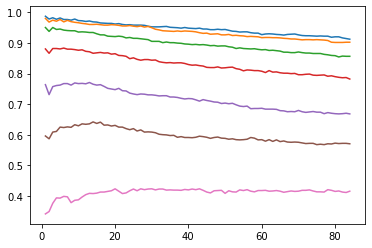

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt


def line_plot(x):
    """
    creates a line plot of [0-56], [0-48], [0-40], [0-32], [0-24], [0-16], [0-8]
    the pixel boxes (scroll to bottom after cell outputs)
    """
    sns.lineplot(x = x[1], y =x[0])
    
    plt.show

digit_7 = line_plot(mask_digit(56))
digit_6 = line_plot(mask_digit(48))
digit_5 = line_plot(mask_digit(40))
digit_4 = line_plot(mask_digit(32))
digit_3 = line_plot(mask_digit(24))
digit_2 = line_plot(mask_digit(16))
digit_1 = line_plot(mask_digit(8))

In [67]:
from tabulate import tabulate
def best_mask_k():
    """
    creates a ASCII table of number of pixels v best k value
    """
    table = [[56, mask_digit(56)[2]], [48, mask_digit(48)[2]], [40, mask_digit(40)[2]], [32, mask_digit(32)[2]], [24, mask_digit(24)[2]], [16, mask_digit(16)[2]], [8, mask_digit(8)[2]]]
    # print(tabulate(table,["number of pixels", "best k"], tablefmt="grid"))
    print(tabulate(table, headers = ["number of pixels", "best k"]))

best_mask_k()

  number of pixels    best k
------------------  --------
                56         1
                48         1
                40         1
                32         6
                24        13
                16        14
                 8        20


### Results
- It went great! We noticed that as we decreased the number of pixels, the best k increased. The more pixels, the accuracy seems to decrease linearly. However, when there is less pixels, it peaks at certain points. 